<font size="5"> **¿Cuál es un mejor plan?** </font>

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Vamos a embarcarnos en el siguiente proyecto para llegar a la isla que contiene las respuestas a las siguientes preguntas:
1. ¿El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere?
2. ¿El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones?
  
Para contestar esas dudas vamos a contar con 5 tablas de datos las cuales tendremos que corregir, enriquecer y finalmente fabricar una sola tabla con toda la información pertinente para posteriormente sacar conclusiones.
  
Nuestras conclusiones se basaran en los gráficos, valores y más importante; en las pruebas estadísticas que vayamos a someter a nuestros datos.

**Tabla de contenidos**<a id='toc0_'></a>    
- [Inicialización](#toc1_)    
- [Cargar los datos](#toc2_)    
- [Preparar los datos](#toc3_)    
  - [Planes](#toc3_1_)    
  - [Usuarios](#toc3_2_)    
    - [Corregir datos](#toc3_2_1_)    
    - [Enriquecer datos](#toc3_2_2_)    
  - [Llamadas](#toc3_3_)    
    - [Corregir datos](#toc3_3_1_)    
  - [Mensajes](#toc3_4_)    
    - [Corregir datos](#toc3_4_1_)    
  - [Internet](#toc3_5_)    
    - [Corregir datos](#toc3_5_1_)    
- [Estudiar las condiciones del plan](#toc4_)    
- [Agregar datos por usuario](#toc5_)    
  - [Usuarios y Meses Ausentes](#toc5_1_)    
- [Estudia el comportamiento del usuario](#toc6_)    
  - [Llamadas](#toc6_1_)    
  - [Mensajes](#toc6_2_)    
  - [Internet](#toc6_3_)    
  - [Ingreso](#toc6_4_)    
- [Probar las hipótesis estadísticas.](#toc7_)    
  - [El ingreso promedio de los usuarios de los usuario de las tarifas de Ultimate y Surf difiere?](#toc7_1_)    
  - [El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones?](#toc7_2_)    
- [Conclusión general](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Inicialización](#toc0_)

Primero vamos a cargar las librerías con las que vamos a trabajar.

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# <a id='toc2_'></a>[Cargar los datos](#toc0_)

Ahora cargamos las tablas en sus respectivas variables.

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('../datasets/megaline_calls.csv')
internet = pd.read_csv('../datasets/megaline_internet.csv')
messages = pd.read_csv('../datasets/megaline_messages.csv')
plans = pd.read_csv('../datasets/megaline_plans.csv')
users = pd.read_csv('../datasets/megaline_users.csv')

# <a id='toc3_'></a>[Preparar los datos](#toc0_)

Ahora vamos a ir tabla por tabla explorando sus datos, corrigiendo algún tipo de error que tengan y de ser posible tratando de enriquecer sus tablas con una columna que nos sea de mayor utilidad.

## <a id='toc3_1_'></a>[Planes](#toc0_)

In [3]:
plans.info()
plans.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**La tabla plans (datos sobre las tarifas):**
- `plan_name` — nombre de la tarifa
- `usd_per_minute` — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
- `usd_per_message` — precio por SMS tras exceder los límites del paquete
- `usd_per_gb` — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)
- `usd_monthly_pay` — pago mensual en dólares estadounidenses
- `minutes_included` — minutos incluidos al mes
- `mb_per_month_included` — datos incluidos al mes (en megabytes)
- `messages_included` — SMS incluidos al mes

Podemos observar como tenemos dos planes: *Surf y Ultimate*. Podemos notar como el paquete *Ultimate* tiene más mensajes, mb y minutos, pero un menor precio para acceder a recursos por encima de los que vienen con el plan. Todo eso se da a un precio 3.5 veces mayor aunque se obtienen más de 3.5 mensajes y minutos de llamada, no es el caso de Mb.
  
Se ve claramente que eventualmente se vuelve más rentable el paquete *Ultimate* si decidimos simplemente gastar Gb, pero algo tan vago no nos sirve por lo que vamos a graficar y ver exactamente en que punto se vuelve más rentable.

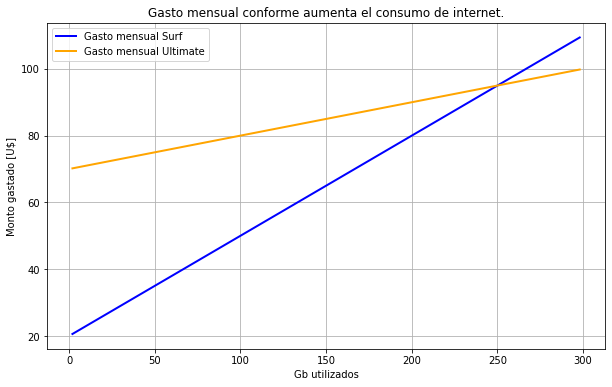

In [4]:
# Creamos los valores de x en donde vamos a graficar
x = np.arange(2, 300, 4)

# Creamos los parámetros para la función
m1, c1 = 0.3, 20
m2, c2 = 0.1, 70

# Calculamos los valores de y para cada valor de x
y1 = (m1 * x) + c1
y2 = (m2 * x) + c2

# Finalmente graficamos
plt.figure(figsize=(10,6))
plt.plot(x, y1, linewidth=2, label='Gasto mensual Surf',color='blue')
plt.plot(x, y2, linewidth=2, label='Gasto mensual Ultimate',color='orange')
plt.title('Gasto mensual conforme aumenta el consumo de internet.')
plt.xlabel('Gb utilizados')
plt.ylabel('Monto gastado [U$]')
plt.grid()
plt.legend()
plt.show()

Éste gráfico nos permite ver como recien tras solicitar 250 Gb (y gastar U$95) se cruzan las lineas y podemos entender que si alguien va a gastar +250 Gb le conviene entonces el plan *Ultimate*. Ahora hay que encontrar quien usa tantos datos móbiles en un mes! O no, ese no es nuestro trabajo.
  
Finalmente podemos quedarnos tranquilos ya que no vemos ninguna irregularidad en la tabla ya sea en tipo de columnas o presencia de valores nulos.

## <a id='toc3_2_'></a>[Usuarios](#toc0_)

In [5]:
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


**La tabla users (datos sobre los usuarios):**

- `user_id` — identificador único del usuario
- `first_name` — nombre del usuario
- `last_name` — apellido del usuario
- `age` — edad del usuario (en años)
- `city` — ciudad de residencia del usuario
- `reg_date` — fecha de suscripción (dd, mm, aa)
- `plan` — nombre de la tarifa
- `churn_date` — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)

En el caso de `users` a primera vista vemos que la columna `reg_date` aparece como object y al igual que la columna `churn_date`, veremos si podemos hacer algo al respecto. Tambien vamos a buscar por si tenemos algun usuario duplicado y se me viene a la mente una columna que podriamos agregar dandole ids a los tipos de planes.

### <a id='toc3_2_1_'></a>[Corregir datos](#toc0_)

Ahora vamos a revisar si tenemos algun usuario duplicado en nuestra tabla y posteriormente vamos a convertir las columnas `reg_date` y `churn_date` a columnas datetime para poder trabajar en un futuro con ellas de manera algebraica (sumando y restando fechas).

In [6]:
# Como dije, primero los duplicados
users.duplicated().sum()

0

Perfecto, ahora vamos a tratar las columnas `reg_date` y `churn_date`!

In [7]:
# El caso de reg_date es bastante directo, si tenemos algun nulo la funcion to_datetime nos va a avisar
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [8]:
# En el caso de churn_date es un poco más complicado ya que tenemos que lidiar con los nulos
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d',errors='coerce')

In [9]:
# Verificamos los cambios
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


In [10]:
# Verifiquemos entonces los dtypes
users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

### <a id='toc3_2_2_'></a>[Enriquecer datos](#toc0_)

Ahora vamos a buscar darle más valor o simplicidad a la tabla para nuestro trabajo futuro. Primero voy a crear una columna en la que voy a categorizar por edades a los clientes y despues como dije vamos a crear una columna id para los planes.

In [11]:
# Antes veamos que edades nos encontramos en la columna
users['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

In [12]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


In [13]:
# Por supuesto, vamos a necesitar una funcion para categorizar 
def age_categ(row):
    age = row['age']
    if age < 30:
        return 0
    elif age < 40:
        return 1
    elif age < 50:
        return 2
    elif age < 60:
        return 3
    elif age < 70:
        return 4
    else:
        return 5
    

In [14]:
# Probamos la funcion
print(age_categ(users.loc[0,:]),
age_categ(users.loc[1,:]),
age_categ(users.loc[2,:]),
age_categ(users.loc[3,:]),
age_categ(users.loc[4,:]))

2 0 1 3 2


In [15]:
# Con nuestra funcion funcionando a la perfeccion, vamos a agregar la columna
age_catg = users.apply(age_categ,axis=1)

users.insert(loc = 4,
            column = 'age_catg',
            value = age_catg)
users

,user_id,first_name,last_name,age,age_catg,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,2,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,1,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,3,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,2,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,4,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,2,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,2,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,3,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


In [16]:
# Ahora vamos a crear la columna de plan_id
plan_id = (users.replace({ 
           'surf': 0,
           'ultimate': 1
          })['plan'])      # Si bien vamos a agregar algo, la funcion replace me sirve para este caso

users.insert(loc = 8,
            column = 'plan_id',
            value = plan_id)
users

,user_id,first_name,last_name,age,age_catg,city,reg_date,plan,plan_id,churn_date
0,1000,Anamaria,Bauer,45,2,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1,NaT
1,1001,Mickey,Wilkerson,28,0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,NaT
2,1002,Carlee,Hoffman,36,1,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,NaT
3,1003,Reynaldo,Jenkins,52,3,"Tulsa, OK MSA",2018-01-28,surf,0,NaT
4,1004,Leonila,Thompson,40,2,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0,NaT
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,4,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,0,NaT
496,1496,Ariel,Shepherd,49,2,"New Orleans-Metairie, LA MSA",2018-02-20,surf,0,NaT
497,1497,Donte,Barrera,49,2,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,1,NaT
498,1498,Scot,Williamson,51,3,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0,NaT


## <a id='toc3_3_'></a>[Llamadas](#toc0_)

In [17]:
calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [4]:
type(calls)

pandas.core.frame.DataFrame

**La tabla calls (datos sobre las llamadas):**

- id — identificador único de la llamada
- user_id — el identificador del usuario que realiza la llamada
- call_date — fecha de la llamada
- duration — duración de la llamada (en minutos)

De lo que podemos ver notamos primero que la columna `call_date` no tiene un formato apropiado y a primera vista parece que la columna `id` ya incluye al `user_id`. Para nuestra suerte no vemos valores nulos y tendriamos que verificar por duplicados. 

### <a id='toc3_3_1_'></a>[Corregir datos](#toc0_)

Ahora vamos a observar los datos y ver si tenemos algo que corregir.

In [18]:
# Antes que nada verifiquemos que no haya duplicados
calls.duplicated().sum()

0

In [19]:
# Sin duplicados de por medio vamos a proceder a cambiar el tipo de datos en `call_date`
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [20]:
# Verificamos
calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

Ahora vamos a verificar si efectivamente en la columna `id` siempre se presenta el `caller_id` antes del _

In [21]:
# Ahora agrupemos por la columnas `user_id` y veamos si efectivamente se mantiene el patron
calls.groupby('user_id',group_keys=True).apply(lambda x: x)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [22]:
# A primera vista parece que si, pero tomemos unas filas aleatorias para ver si se mantiene
calls.groupby('user_id',group_keys=True).apply(lambda x: x).loc[[1156,1250,1369,1420],:]

,id,user_id,call_date,duration
1156,1007_177,1007,2018-12-15,6.27
1250,1007_271,1007,2018-12-16,2.51
1369,1008_10,1008,2018-10-20,10.43
1420,1008_61,1008,2018-10-05,4.13


Como no me quiero quedar con una simple muestra aleatorizada incompleta vamos a hacer una funcion rapida que nos ayude a verificar con seguridad si esa relación se corresponde.

In [23]:
def user_id_in_id(row):
    if str(row['user_id']) in row['id']: # Hacemos que nos devuelva un False para poder aplicar sum() despues
        return False
    else:
        return True

In [24]:
calls.apply(user_id_in_id,axis=1).sum()

0

In [25]:
# Con la seguridad de que el `user_id` se encuentra en `id` vamos a simplemente sacar esa informacion innecesaria
# Para eso haremos otra funcion
def remove_id(row):
    clean_id = row['id'].replace(f'{row["user_id"]}_','')
    return clean_id

In [26]:
# Probamos la funcion
remove_id(calls.loc[0,:])

'93'

In [27]:
# Con la funcion funcional, vamos a hacer el cambio efectivo
calls['id'] = calls.apply(remove_id,axis=1)

In [28]:
# Verificamos como nos quedó la tabla
calls

,id,user_id,call_date,duration
0,93,1000,2018-12-27,8.52
1,145,1000,2018-12-27,13.66
2,247,1000,2018-12-27,14.48
3,309,1000,2018-12-28,5.76
4,380,1000,2018-12-30,4.22
...,...,...,...,...
137730,199,1499,2018-11-21,8.72
137731,200,1499,2018-10-20,10.89
137732,201,1499,2018-09-21,8.12
137733,202,1499,2018-10-10,0.37


In [29]:
# Esa llamada con duración 0.37 me hizo pensar en si habrá llamadas con duración 0
calls.loc[calls.duration == 0,:].shape[0]

26834

Efectivamente vemos que hay llamadas con tiempo 0 y al parecer no son pocas aunque tampoco demasiadas. Posiblemente surjan de una llamada perdida o una llamada que se canceló en el momento justo... aunque tiene más sentido que sean llamadas perdidas.
  
Ahora entra la duda: **¿Que hacemos con ellas?**
  
Despues de ponderar por un momento decidí en dejarlas e incluirlas en el trabajo ya que por una parte no van a influenciar a la cantidad de minutos  y por otra parte si representan la actividad de un cliente.
  
Por lo tanto solo tenemos que seguir sin más!

In [30]:
# Por ultimo, vamos a modificar el nombre de la columna 'id' para que evitar posibles confusiones en el futuro
calls.rename(columns={'id':'call_id'},inplace=True)

In [31]:
# Verificamos una vez mas
calls

,call_id,user_id,call_date,duration
0,93,1000,2018-12-27,8.52
1,145,1000,2018-12-27,13.66
2,247,1000,2018-12-27,14.48
3,309,1000,2018-12-28,5.76
4,380,1000,2018-12-30,4.22
...,...,...,...,...
137730,199,1499,2018-11-21,8.72
137731,200,1499,2018-10-20,10.89
137732,201,1499,2018-09-21,8.12
137733,202,1499,2018-10-10,0.37


Nuestro trabajo acá ya está terminado, podriamos pensar en que nos convendría cambiar el *dtype* de `id` a `int`, pero como no planeamos realizar operaciones algebraicas sobre ellos es indiferente ese cambio.
  
Honestamente, no se me ocurren formas de agregar columnas que aporten algo significativo a el dataset por lo que vamos a seguir al siguiente dataset directamente!

## <a id='toc3_4_'></a>[Mensajes](#toc0_)

In [32]:
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


**La tabla messages (datos sobre los SMS):**
- id — identificador único del SMS
- user_id — el identificador del usuario que manda el SMS
- message_date — fecha del SMS

Vemos los mismos problemas que tenia `users` por lo que es cuestion de solucionarlos y seguir.

### <a id='toc3_4_1_'></a>[Corregir datos](#toc0_)

In [33]:
# Primero corregimos el dtype de la columna `message_date`
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [34]:
# Verificamos
messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

In [35]:
# Controlamos que no haya `id` que no correspondan a `user_id`
messages.apply(user_id_in_id,axis=1).sum()

0

In [36]:
# Y ahora es cuestion de simplemente limpiar esos valores
messages['id'] = messages.apply(remove_id,axis=1)

In [37]:
messages.rename(columns={'id':'message_id'},inplace=True)

In [38]:
# Verificamos
messages

,message_id,user_id,message_date
0,125,1000,2018-12-27
1,160,1000,2018-12-31
2,223,1000,2018-12-31
3,251,1000,2018-12-27
4,255,1000,2018-12-26
...,...,...,...
76046,526,1497,2018-12-24
76047,536,1497,2018-12-24
76048,547,1497,2018-12-31
76049,558,1497,2018-12-24


Al igual que `calls`, no podemos aportar ninguna columna muy significativa a la tabla `messages` por lo que solo nos queda seguir.

## <a id='toc3_5_'></a>[Internet](#toc0_)

In [39]:
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


**La tabla internet (datos sobre las sesiones web):**
- id — identificador único de la sesión
- user_id — identificador del usuario
- session_date — fecha de la sesión web
- mb_used — el volumen de datos gastados durante la sesión (en megabytes)

Una vez más nos encontramos con un patrón similar, aunque tiene sentido ya que las tablas son practicamente historiales de llamadas/mensajes/sesiones web. No es negativo en absoluto ya que desarrollamos herramientas para lidiar con ésta situación que nos van a servir una vez más!

### <a id='toc3_5_1_'></a>[Corregir datos](#toc0_)

Vamos a mantener el mismo orden, primero vamos a corregir el *dtype* de la columan `session_date`, despues vamos a analizar la columna `id` y modificarla para eliminar los `user_id` que pueda tener en sus valores. Finalmente le cambiaremos el nombre de la columna `id` a `internet_id` para más claridad en el trabajo futuro.

In [40]:
# Primero corregimos el dtype de la columna `session_date`
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [41]:
# Verificamos el cambio
internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

In [42]:
# Verificamos que no tenga un valor fuera de lo esperado
internet.apply(user_id_in_id,axis=1).sum()

0

In [43]:
# Y ahora limpiamos esos valores
internet['id'] = internet.apply(remove_id,axis=1)

In [44]:
# Finalmente cambiamos el nombre
internet.rename(columns={'id':'session_id'},inplace=True)

In [45]:
# Y vemos como quedó
internet

,session_id,user_id,session_date,mb_used
0,13,1000,2018-12-29,89.86
1,204,1000,2018-12-31,0.00
2,379,1000,2018-12-28,660.40
3,413,1000,2018-12-26,270.99
4,442,1000,2018-12-27,880.22
...,...,...,...,...
104820,215,1499,2018-10-20,218.06
104821,216,1499,2018-12-30,304.72
104822,217,1499,2018-09-22,292.75
104823,218,1499,2018-12-07,0.00


Y al igual que `calls` y `messages` al ser basicamente un registro no podemos aportar nada muy significativo por lo que es mejor dejarlas así.

# <a id='toc4_'></a>[Estudiar las condiciones del plan](#toc0_)

Vamos a buscar repasar sobre las condiciones de cada plan, dejar bien descrito y entendido las características de cada uno y como se aplican a diferentes situaciones. Para eso, veamos de vuelta la tabla `plans`.

In [46]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


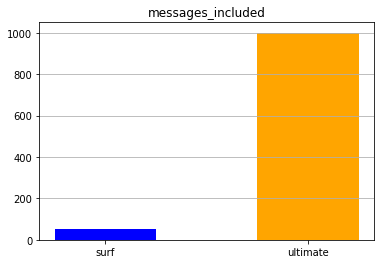

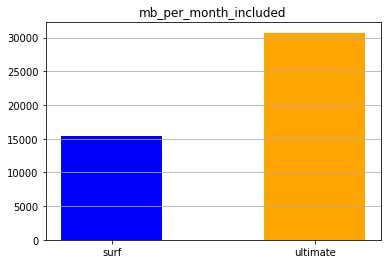

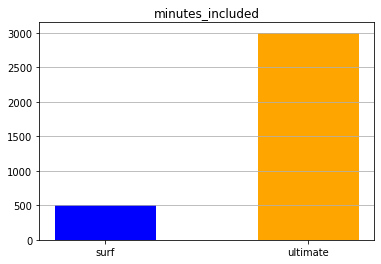

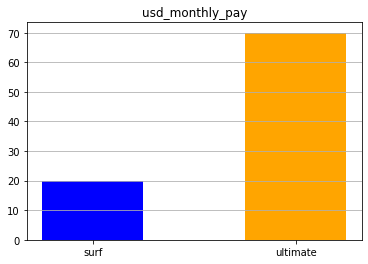

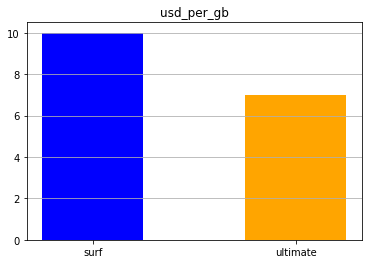

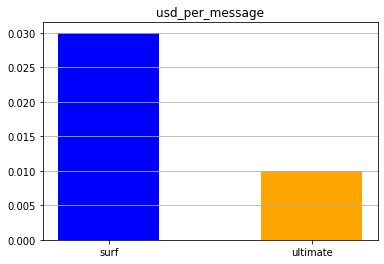

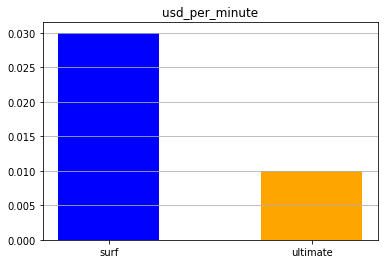

In [47]:
# Veamos de manera gráfica un par de columnas 
for column in plans:
    if column != 'plan_name':
        bar_graph = plt.bar(
            x=plans['plan_name'],
            height=plans[column],
            width=0.5,
            color=['blue','orange']
            )
        plt.grid(axis='y')
        plt.title(column)
        #plt.bar_label(bar_graph)
        plt.show()

Una gráficamente solo se hace más evidente la amplia diferencia que provee el plan *Ultimate* en lo que a recursos respecta y vemos claramente como la diferencia de precio rinde en *messages y minutes*, más tomando en cuenta que si se llega al caso extremo de gastar los recursos que vienen con el plan.

# <a id='toc5_'></a>[Agregar datos por usuario](#toc0_)
  
Con los datos limpios, vamos a proceder a crear una tabla con todo el uso de recursos y actividad de un cliente. Tambien incluiremos su id y su plan aparte de finalmente agregar en base a los valores de la tabla el recuento final de cuánto tuvo que pagar dicho cliente.
  
Ésto facilitará mucho el análisis al concentrar todas las variables que nos interesan en una tabla mientras a la vez eliminamos las que no vamos a tratar.

In [48]:
# Ahora vamos a obtener una tabla en la que se pueda ver cuántas llamadas realizó un usuario en un determinado mes

# Primero agrupamos por usuario y mes reiniciando el índice para poder trabajar
monthly_calls = calls.groupby(['user_id','call_date']).count().reset_index()

# De ahí nos deshacemos de la columna 'duration' que no nos sirve
monthly_calls.drop(columns='duration',inplace=True)

# Transformamos las celdas de fechas en celdas de meses
monthly_calls['call_date'] = monthly_calls['call_date'].dt.month

# Renombramos la columna `call_date` y `call_id` para que queden acorde
monthly_calls.rename(columns={'call_date':'month','call_id':'total_calls'},inplace=True)

# Ahora agrupamos una vez más para "juntar los meses"
monthly_calls = monthly_calls.groupby(['user_id','month']).sum()

# No reiniciamos el indice ya que eso nos permitira unir todas las tablas en un futuro con más facilidad

In [49]:
# Vemos como quedó
monthly_calls

total_calls
user_id month             
1000    12              16
1001    8               27
        9               49
        10              65
        11              64
...                    ...
1498    12              39
1499    9               41
        10              53
        11              45
        12              65

[2258 rows x 1 columns]

Estaba considerando hacer una funcion que logre ésto, pero despues de pensarlo detenidamente habría que darle tantos parámetros a la función ya que la forma de actuar y nombrar va a diferir entre cada uno de los dataframes. Por lo tanto voy a recurrir a la hermosa herramienta de Ctrl+C -> Ctrl+V

In [50]:
# Ahora vamos a obtener una tabla en la que se pueda ver cuantos mensajes mandó un usuario en un determinado mes

# Primero agrupamos por usuario y mes reiniciando el índice para poder trabajar
monthly_minutes = calls[['user_id','call_date','duration']].groupby(['user_id','call_date']).sum().reset_index()

# Transformamos las celdas de fechas en celdas de meses
monthly_minutes['call_date'] = monthly_minutes['call_date'].dt.month

# Renombramos la columna `call_date` y `call_id` para que queden acorde
monthly_minutes.rename(columns={'call_date':'month','duration':'total_minutes'},inplace=True)

# Ahora agrupamos una vez más para "juntar los meses"
monthly_minutes = monthly_minutes.groupby(['user_id','month']).sum()

In [51]:
# Vemos como quedó
monthly_minutes

total_minutes
user_id month               
1000    12            116.83
1001    8             171.14
        9             297.69
        10            374.11
        11            404.59
...                      ...
1498    12            324.77
1499    9             330.37
        10            363.28
        11            288.56
        12            468.10

[2258 rows x 1 columns]

In [52]:
# Ahora vamos a obtener una tabla en la que se pueda ver cuántas llamadas realizó un usuario en un determinado mes

# Primero agrupamos por usuario y mes reiniciando el índice para poder trabajar
monthly_messages = messages.groupby(['user_id','message_date']).count().reset_index()

# Transformamos las celdas de fechas en celdas de meses
monthly_messages['message_date'] = monthly_messages['message_date'].dt.month

# Renombramos la columna `call_date` y `call_id` para que queden acorde
monthly_messages.rename(columns={'message_date':'month','message_id':'total_messages'},inplace=True)

# Ahora agrupamos una vez más para "juntar los meses"
monthly_messages = monthly_messages.groupby(['user_id','month']).sum()


In [53]:
# Vemos como quedó
monthly_messages

total_messages
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
...                       ...
1496    9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

In [54]:
# Ahora vamos a obtener una tabla en la que se pueda ver cuánto uso internet un usuario en un determinado mes

# Primero agrupamos por usuario y mes reiniciando el índice para poder trabajar
monthly_internet = internet[['user_id','session_date','mb_used']].groupby(['user_id','session_date']).sum().reset_index()

# Transformamos las celdas de fechas en celdas de meses
monthly_internet['session_date'] = monthly_internet['session_date'].dt.month

# Renombramos la columna `call_date` y `call_id` para que queden acorde
monthly_internet.rename(columns={'session_date':'month','mb_used':'mb_used_per_month'},inplace=True)

# Ahora agrupamos una vez más para "juntar los meses"
monthly_internet = monthly_internet.groupby(['user_id','month']).sum()


In [55]:
# Vemos como quedó
monthly_internet

mb_used_per_month
user_id month                   
1000    12               1901.47
1001    8                6919.15
        9               13314.82
        10              22330.49
        11              18504.30
...                          ...
1498    12              23137.69
1499    9               12984.76
        10              19492.43
        11              16813.83
        12              22059.21

[2277 rows x 1 columns]

Con nuestras tablas mensuales hechas vamos a proceder a unirlas todas para lograr el resultado final de la actividad del cliente a lo largo de un mes!

In [56]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
activity_table = (pd.concat(
    [monthly_calls,monthly_minutes,monthly_messages,monthly_internet],
    axis=1)
    .sort_values('user_id')
    .reset_index()
    )
activity_table

,user_id,month,total_calls,total_minutes,total_messages,mb_used_per_month
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1498,6,37.0,225.57,NaN,14807.18
2289,1499,10,53.0,363.28,NaN,19492.43
2290,1499,11,45.0,288.56,NaN,16813.83
2291,1499,9,41.0,330.37,NaN,12984.76


In [57]:
activity_table.fillna(0,inplace=True)

In [58]:
# Vamos a hacer una funcion que nos ayude a obtener el plan de cada usuario
def match_plan_with_id(row):
    id = row['user_id']
    plan = users[users['user_id'] == id]['plan'].values[0]
    return plan

In [59]:
# Probamos la funcion
match_plan_with_id(activity_table.loc[115,:])

'ultimate'

In [60]:
# Finalmente aplicamos la funcion
activity_table.apply(match_plan_with_id,axis=1)

0       ultimate
1           surf
2           surf
3           surf
4           surf
          ...   
2288        surf
2289        surf
2290        surf
2291        surf
2292        surf
Length: 2293, dtype: object

In [61]:
# Con la funcion lista, vamos a crear la columna 'plan' en activity_table
activity_table['plan'] = activity_table.apply(match_plan_with_id,axis=1)

In [62]:
# Verificamos
activity_table = activity_table.astype({'total_calls':int,'total_messages':int})

In [63]:
# Vemos como quedó
activity_table

,user_id,month,total_calls,total_minutes,total_messages,mb_used_per_month,plan
0,1000,12,16,116.83,11,1901.47,ultimate
1,1001,8,27,171.14,30,6919.15,surf
2,1001,9,49,297.69,44,13314.82,surf
3,1001,10,65,374.11,53,22330.49,surf
4,1001,11,64,404.59,36,18504.30,surf
...,...,...,...,...,...,...,...
2288,1498,6,37,225.57,0,14807.18,surf
2289,1499,10,53,363.28,0,19492.43,surf
2290,1499,11,45,288.56,0,16813.83,surf
2291,1499,9,41,330.37,0,12984.76,surf


## <a id='toc5_1_'></a>[Usuarios y Meses Ausentes](#toc0_)

Originalmente iba a nombrar la tabla `complete_table` pero en un momento me dí cuenta algo muy básico. Si un cliente no usa su celular a lo largo de un mes no aparecerá en `activity_table` pero si tendrá que pagar la cuota mensual! 
  
Ahora, que tan dificil es no gastar nada durante un mes? Ni llamadas, ni mensajes, ni datos moviles? La respuesta en mi opinion, es bastante fácil. Solo se requiere de mantenerse en una red de internet wifi y de ahí con aplicaciones como Telegram o WhatsApp uno puede hacer llamadas, mandar mensajes sin problemas y bueno... uno no va a usar datos para ver un video si está conectado a wifi!
  
Por lo que voy a verificar cuántos de esos usuarios hay.

In [64]:
# Ahora vemos como quedo la tabla
len(activity_table['user_id'].unique()) - len(users)

-10

Como podemos ver, efectivamente hay 10 clientes que no usaron los servicios a lo largo del año! Casos excepcionales, y si hay 10 que hicieron eso quien sabe cuántos clientes no usaron sus servicios a lo largo de 1 mes nada más! Antes de asignar los ingresos mensuales habría que asegurarnos que la `activity_table` tenga todos los clientes aún si no hicieron nada respecto al plan y asegurarnos de no incluir a un cliente en un mes previo a `reg_date` o posterior a `churn_date`.

In [65]:
activity_table

,user_id,month,total_calls,total_minutes,total_messages,mb_used_per_month,plan
0,1000,12,16,116.83,11,1901.47,ultimate
1,1001,8,27,171.14,30,6919.15,surf
2,1001,9,49,297.69,44,13314.82,surf
3,1001,10,65,374.11,53,22330.49,surf
4,1001,11,64,404.59,36,18504.30,surf
...,...,...,...,...,...,...,...
2288,1498,6,37,225.57,0,14807.18,surf
2289,1499,10,53,363.28,0,19492.43,surf
2290,1499,11,45,288.56,0,16813.83,surf
2291,1499,9,41,330.37,0,12984.76,surf


In [66]:
# Para identificar a estos "usuarios fantasma" vamos a recurrir a un for-if y un poco de lógica y así obtener

# Primero creamos unas variables globales con 999 sabiendo que la primera id es 1000, aparte de crear donde vamos a guardar las id fantasma
prev = 999 
missing = []

# De ahi solo recorremos los valores únicos de user_id en la `activity_table` 
for id in np.sort(activity_table['user_id'].unique()):
    # Comprobamos si el anterior numero guardado + 1 es diferente al que tenemos ahora
    if prev + 1 != id:
        missing.append(id - 1) # De ser así, sabemos que el numero anterior a la id q tenemos ahora está faltando
    prev = id # Finalmente cambiamos el prev al id que tenemos ahora

# Mostramos que números nos faltan
missing

[1025, 1129, 1143, 1269, 1275, 1307, 1319, 1378, 1463, 1473]

Sabiendo ya cuales son los "usuarios fantasma" (quienes no mostraron actividad a pesar de tener el servicio), ahora vamos a encargarnos de incluirlos en la tabla general. Para eso tendremos que crear un df en donde tengamos el `user_id`, el `month` y `plan` de cada uno para posteriormente unirlo a `activity_table`.
  
Una funcion vendría de maravilla para crear las filas que simplemente tomen en cuenta los meses.

In [67]:
def fill_missing(id): 
    # Primero guardamos el plan y el mes del cliente
    plan_4_missing = users.loc[users.user_id == id,'plan'].values[0]
    month_4_missing = users.loc[users.user_id == id,'reg_date'].dt.month.values[0]
    end_month = 13

    if (not pd.isnull(users.loc[users.user_id == id,'churn_date'].values[0])): # Es un caso muy particular, pero si el cliente se dio de baja a lo largo del año
        end_month = users.loc[users.user_id == id,'churn_date'].dt.month + 1 # Vamos a sumar 1 para correjir por la forma de trabajar de range()
    
    dataframe = pd.DataFrame(columns=['user_id','month','plan'])

    for month in range(month_4_missing,int(end_month)):
        dataframe = pd.concat([
            dataframe,
            pd.DataFrame({'user_id':[id],'month':[month],'plan':[plan_4_missing]})])

    return dataframe

In [68]:
# Verificamos el funcionamiento
fill_missing(1319)

,user_id,month,plan
0,1319,6,surf
0,1319,7,surf
0,1319,8,surf
0,1319,9,surf
0,1319,10,surf
0,1319,11,surf
0,1319,12,surf


In [69]:
# Ahora vamos a aplicar la funcion a los clientes fantasma
all_missing_df = pd.DataFrame(columns=['user_id','month','plan'])
for userid in missing:
    all_missing_df = pd.concat([all_missing_df,fill_missing(userid)])
all_missing_df = all_missing_df.reset_index(drop=True)
all_missing_df

,user_id,month,plan
0,1025,10,ultimate
1,1025,11,ultimate
2,1025,12,ultimate
3,1129,11,surf
4,1129,12,surf
5,1143,10,surf
6,1143,11,surf
7,1143,12,surf
8,1269,9,ultimate
9,1269,10,ultimate


En vez de simplemente reemplazar, voy a crear una variable nueva en la que cargaré todos esos clientes fantasmas y cualquier otro cambio del estilo que decida hacer para despues analizar las dos tablas y ver que obtenemos de ello.

In [70]:
# Finalmente agregamos los datos fantasma a la tabla general
activity_table_with_missing = pd.concat([activity_table,all_missing_df]).fillna(0).sort_values('user_id').reset_index(drop=True)

In [71]:
# Y revisamos como quedó la tabla
activity_table_with_missing

,user_id,month,total_calls,total_minutes,total_messages,mb_used_per_month,plan
0,1000,12,16.0,116.83,11.0,1901.47,ultimate
1,1001,8,27.0,171.14,30.0,6919.15,surf
2,1001,9,49.0,297.69,44.0,13314.82,surf
3,1001,10,65.0,374.11,53.0,22330.49,surf
4,1001,11,64.0,404.59,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2314,1498,6,37.0,225.57,0.0,14807.18,surf
2315,1499,12,65.0,468.10,0.0,22059.21,surf
2316,1499,9,41.0,330.37,0.0,12984.76,surf
2317,1499,11,45.0,288.56,0.0,16813.83,surf


Un pensamiento que tuve mientras trabajaba en lo anterior fue: Si algunos clientes pasaron tanto tiempo sin tener actividad, que detiene a un cliente de no tener actividad durante 1 mes? Por lo que mi siguiente aventura será no solo descubrir los "clientes fantasma" sino tambien esos "meses fantasma".
  
Habrá que hacer otra funcion que nos ayude con eso!

In [72]:
def fill_missing_months(ids):
    dataframe = pd.DataFrame(columns=['user_id','month','plan'])
    for user_id in ids:    
        active_months = activity_table.loc[activity_table.user_id == user_id,'month'].values
        reg_month = users.loc[users.user_id == user_id,'reg_date'].dt.month.values[0]
        end_month = 13
        plan = users.loc[users.user_id == user_id,'plan'].values[0]

        # De vuelta, tomamos la precaución por si el usuario se dio de baja
        if (not pd.isnull(users.loc[users.user_id == id,'churn_date'].values[0])): 
            end_month = users.loc[users.user_id == user_id,'churn_date'].dt.month.values[0] + 1

        for month in range(reg_month,end_month):
            if month not in active_months:
                dataframe = pd.concat([dataframe, pd.DataFrame({'user_id':[user_id],'month':[month],'plan':[plan]})])
    return dataframe

In [73]:
# Cargamos los meses faltantes en una variable para no cargar a la computadora cada que quieramos verlos
missing_months = fill_missing_months(users['user_id'].values)

In [74]:
# Y ahora la veamos
missing_months

,user_id,month,plan
0,1003,1,surf
0,1003,2,surf
0,1003,3,surf
0,1003,4,surf
0,1003,5,surf
...,...,...,...
0,1496,7,surf
0,1499,5,surf
0,1499,6,surf
0,1499,7,surf


In [75]:
# Primero veremos la fecha de registro en la tabla users, elegimos la id 1003 ya que la vemos ahí
users.loc[users.user_id == 1003,:]

,user_id,first_name,last_name,age,age_catg,city,reg_date,plan,plan_id,churn_date
3,1003,Reynaldo,Jenkins,52,3,"Tulsa, OK MSA",2018-01-28,surf,0,NaT


In [76]:
# Revisamos si efectivamente no hay actividad
activity_table.loc[activity_table.user_id == 1003,:]

,user_id,month,total_calls,total_minutes,total_messages,mb_used_per_month,plan
9,1003,12,149,1041.0,50,27044.14,surf


In [77]:
# Y con la confianza de que la tabla actuó bien, vamos a agregar esas filas a nuestra tabla
activity_table_with_missing = pd.concat([activity_table_with_missing,missing_months]).fillna(0).sort_values('user_id').reset_index(drop=True)

In [78]:
# Finalmente revisamos cómo quedó todo
activity_table_with_missing

,user_id,month,total_calls,total_minutes,total_messages,mb_used_per_month,plan
0,1000,12,16.0,116.83,11.0,1901.47,ultimate
1,1001,8,27.0,171.14,30.0,6919.15,surf
2,1001,9,49.0,297.69,44.0,13314.82,surf
3,1001,10,65.0,374.11,53.0,22330.49,surf
4,1001,11,64.0,404.59,36.0,18504.30,surf
...,...,...,...,...,...,...,...
3376,1499,10,53.0,363.28,0.0,19492.43,surf
3377,1499,12,65.0,468.10,0.0,22059.21,surf
3378,1499,9,41.0,330.37,0.0,12984.76,surf
3379,1499,7,0.0,0.00,0.0,0.00,surf


Con el tema de los usuarios fantasma fuera del medio, vamos a hacer una funcion para obtener el ingreso por cliente por mes según los recursos que gastó

In [79]:
def get_additional_income(row):

    # Primero creamos estas variables para facilitar el trabajo
    monthly_income = 0
    plan = row['plan']
    mb_used_per_month = float(row.loc['mb_used_per_month'])
    mb_per_month_included = float(plans.loc[(plans.plan_name == plan),'mb_per_month_included'].item())
    usd_per_gb = float(plans.loc[plans.plan_name == plan]['usd_per_gb'])
    total_messages = row.loc['total_messages']
    messages_included = plans.loc[(plans.plan_name == plan),'messages_included'].item()
    usd_per_message = float(plans.loc[plans.plan_name == plan]['usd_per_message'])
    total_minutes = float(row.loc['total_minutes'])
    minutes_included = float(plans.loc[(plans.plan_name == plan),'minutes_included'].item())
    usd_per_minute = float(plans.loc[plans.plan_name == plan]['usd_per_minute'])

    # Sumamos monthly_pay
    monthly_income += plans.loc[(plans.plan_name == plan),'usd_monthly_pay'].item()
    
    # Verificamos si gastó más internet de lo que tiene el plan y sumamos acorde de ser así
    if (mb_used_per_month > mb_per_month_included): # Acá abajo calculamos cuánto gastó, lo pasamos a gb y redondeamos para arriba
        monthly_income += usd_per_gb*np.ceil((mb_used_per_month - mb_per_month_included)/1000)

    # Verificamos si mandó más mensajes de los que tiene el plan y sumamos acorde de ser así
    if (total_messages > messages_included): # Acá abajo calculamos cuántos mandó y
        monthly_income += usd_per_message*(total_messages - messages_included)

    # Verificamos si gastó más minutos de los que tiene el plan y sumamos acorde de ser así
    if (total_minutes > minutes_included): # Aca abajo calculamos cuántos minutos de más gastó y lo redondeamos para arriba
        monthly_income += usd_per_minute*np.ceil(total_minutes - minutes_included)

    # Finalmente devolvemos cuánto fue el gasto total del cliente en ese mes
    return monthly_income

In [80]:
# Probamos la funcion con una fila aleatoria
print(get_additional_income(activity_table.loc[420,:]))

# Imprimimos la fila para verificar a mano
activity_table.loc[420,:]

70


user_id                  1088
month                       8
total_calls                29
total_minutes          226.12
total_messages             42
mb_used_per_month    19089.65
plan                 ultimate
Name: 420, dtype: object

Perfecto, los numeros dan como deberían. Ahora solo queda agregar la fila `monthly_income` a nuestra tabla y va a estar lista!

In [81]:
# Creamos la nueva tabla de monthly_income con la ayuda de apply
activity_table['usd_monthly_income'] = activity_table.apply(get_additional_income,axis=1)

In [82]:
# Hacemos lo mismo para la tabla con ausentes
activity_table_with_missing['usd_monthly_income'] = activity_table_with_missing.apply(get_additional_income,axis=1)

In [83]:
# Por ultimo vemos nuestra hermosa creación
activity_table

,user_id,month,total_calls,total_minutes,total_messages,mb_used_per_month,plan,usd_monthly_income
0,1000,12,16,116.83,11,1901.47,ultimate,70.00
1,1001,8,27,171.14,30,6919.15,surf,20.00
2,1001,9,49,297.69,44,13314.82,surf,20.00
3,1001,10,65,374.11,53,22330.49,surf,90.09
4,1001,11,64,404.59,36,18504.30,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1498,6,37,225.57,0,14807.18,surf,20.00
2289,1499,10,53,363.28,0,19492.43,surf,70.00
2290,1499,11,45,288.56,0,16813.83,surf,40.00
2291,1499,9,41,330.37,0,12984.76,surf,20.00


In [84]:
activity_table_with_missing.head()

,user_id,month,total_calls,total_minutes,total_messages,mb_used_per_month,plan,usd_monthly_income
0,1000,12,16.0,116.83,11.0,1901.47,ultimate,70.00
1,1001,8,27.0,171.14,30.0,6919.15,surf,20.00
2,1001,9,49.0,297.69,44.0,13314.82,surf,20.00
3,1001,10,65.0,374.11,53.0,22330.49,surf,90.09
4,1001,11,64.0,404.59,36.0,18504.30,surf,60.00


# <a id='toc6_'></a>[Estudia el comportamiento del usuario](#toc0_)

Ahora vamos a estudiar la forma de utilizar de los usuarios, para eso vamos a descernir entre los dos planes primero, de ahí con la ayuda de gráficos como historgramas, gráficos de barras y gráficos de cajas y bigotes. Por supuesto, no nos vamos a quedar con simples gráficos y también vamos a mirar detenidamente valores estadísticos como la media y la varianza para sujetarnos más firmemente y sacar mejores conclusiones en conjunto con los gráficos.
    
Sin más vueltas, vamos a los datos!

## <a id='toc6_1_'></a>[Llamadas](#toc0_)

In [85]:
# Primero creamos una tabla con los valores que nos pueden interesar promediados
mean_table = activity_table.groupby(['month','plan']).mean().unstack()

In [86]:
sum_table = activity_table.groupby(['month','plan']).sum().unstack()

In [87]:
# Primero creamos variables para la gráfica 
# Sacamos el tiempo promedio
data = mean_table['total_minutes']/mean_table['total_calls'] 

# Cargamos lo labels para ubicar correctamente las barras
labels = data.index

# Ordenamos los labels y sumamos 1 para que no empiece en 0
x = np.arange(len(labels)) + 1

# Separamos los datos segun los planes
ultimate_data = data['ultimate']
surf_data = data['surf']

# Finalmente definimos el ancho de las barras
width = 0.4

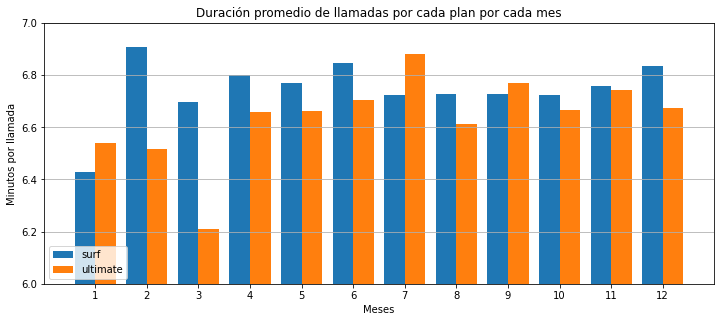

In [88]:
# Primero definimos el figure y el axis para trabajar
fig, ax = plt.subplots(figsize=(12,4.8))

# De ahí definimos las barras
p1 = ax.bar(x - width/2,surf_data,width,label="surf")
p2 = ax.bar(x + width/2,ultimate_data,width,label="ultimate")

# Agregamos unas cosas para limpieza y orden
ax.set_ylabel('Minutos por llamada')
ax.set_xlabel('Meses')
ax.set_title('Duración promedio de llamadas por cada plan por cada mes')
ax.set_xticks(x)
ax.grid(axis='y')
ax.legend(loc='lower left')

# Nos encargamos de saber que valor tiene cada barra con 2 cifras despues de la coma
#ax.bar_label(p1,padding=3,fmt='%.2f')
#ax.bar_label(p2,padding=3,fmt='%.2f')

# Restringimos el valor de y para ver mejor las barras y mostramos
plt.ylim(6,7)
plt.show()

Al ver el gráfico de barras observamos como en la mayoria del año los clientes del plan *surf* tienen mayores tiempos de llamada promedio con Marzo presentando la mayor diferencia de casi medio minuto más y Febrero presentando las llamadas más largas del año en casi 7 minutos!
    
Por supuesto, hay que tener en cuenta que éstas son tiempos de llamada promedio siendo altamente influenciables por valores atípicos, aunque el patrón general si pretende indicar que en la mayoría de los casos los clientes de *surf* pasan más tiempo en sus llamadas que los clientes de *ultimate*. También hay que tener en cuenta que ésto no implica que gasten más minutos necesariamente, solo que **una** llamada de *surf* tiende a durar más que una de *ultimate*.

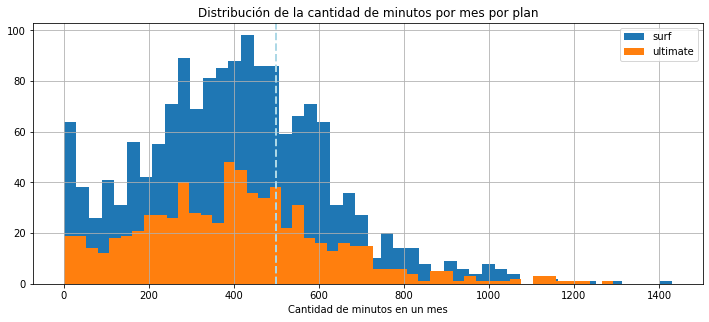

In [89]:
# Ahora vamos a comparar la cantridad de minutos que requieren los usuarios cada mes
fig, ax = plt.subplots(figsize=(12,4.8))
bins = int(np.ceil(np.sqrt(activity_table.shape[0])))

# Definimos los histogramas
activity_table.loc[activity_table.plan == 'surf','total_minutes'].hist(bins = bins, label='surf')
activity_table.loc[activity_table.plan == 'ultimate','total_minutes'].hist(bins = bins, label='ultimate')

# Agregamos una linea con la cantidad de minutos incluidos en surf (no lo hacemos para ultimate pues ese numero es demasiado grande)
plt.axvline(x=500, color='lightblue', linestyle='--', linewidth=2)

# Agregamos detalles de limpieza y orden
ax.set_xlabel('Cantidad de minutos en un mes')
ax.set_title('Distribución de la cantidad de minutos por mes por plan')
ax.legend(loc='upper right')

plt.show()

Algo que se ve claramente en éste histograma es la amplia diferencia numérica en la cantidad de clientes que poseen el pack *surf* contra los que contratan el pack *ultimate*.
  
Tambien podemos notar como más allá de la diferencia en cantidad, ambos planes presentan una distribución no muy diferente con un pico aparente alrededor de 400 minutos por mes. Tambien podemos notar como *surf* presenta una gran cantidad de valores cercanos a 0 mientras que en simultaneo tambien tiene valores extremadamente altos por más pocos que sean; eso nos da un indicio de que posiblemente presente una varianza mayor que *ultimate*.

Para no quedarnos solo con gráficos vamos a buscar obtener la media y la varianza de ambos planes, así tendremos una idea más concreta y rigurosa del comportamiento de los datos en los planes.

In [90]:
# Primero vamos a hacer tablas diferentes separando por plan
ultimate = activity_table.loc[activity_table.plan == 'ultimate']
surf = activity_table.loc[activity_table.plan == 'surf']


In [91]:
# Ahora vamos a calcular la media y la varianza de la duración mensual de llamadas.
print(
    f" Media de ultimate:    {ultimate['total_minutes'].mean():.2f}",'\n',
    f"Varianza de ultimate: {ultimate['total_minutes'].var():.2f}",'\n',
    '\n',
    f"Media de surf:    {surf['total_minutes'].mean():.2f}",'\n',
    f"Varianza de surf: {surf['total_minutes'].var():.2f}"
)

 Media de ultimate:    406.19 
 Varianza de ultimate: 51640.97 
 
 Media de surf:    404.76 
 Varianza de surf: 49135.10


Podemos notar que nuestras sospechas no iban por el lado indicado ya que *surf* presenta una varianza **menor** a *ultimate*! En retrospectiva tiene sentido ya que si bien *surf* posee valores más extremos tambien tiene una cantidad mayor de datos que "suavizan" el impacto de esos valores en la distribución general.
    
Otra cosa que notamos es como a pesar de tener una diferencia tan grande de valores, ambas distribuciones presentan medias muy cercanas!

Ahora para proporcional nuestra última herramienta en el análisis de las llamadas vamos a buscar graficar la distribución de los planes con gráficos de caja y bigotes, lo que nos permitirá observar que tanto difieren los datos entre sí de una manera gráfica y más precisa.

In [92]:
# Primero definimos unas variables que usaermos para graficar
surf_data = surf['total_minutes']
ultimate_data = ultimate['total_minutes']
labels=['surf','ultimate']
colors = ['blue','orange']

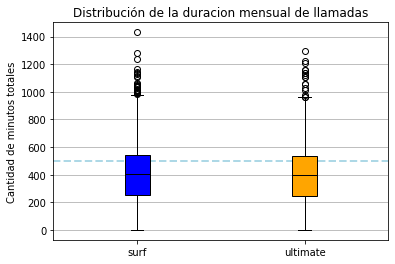

In [93]:
# De ahi trazaremos un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
# Definimos la figura y el eje
fig, ax = plt.subplots()

# Definimos el diagrama de caja propiamente
bplot = ax.boxplot(
    [surf_data,ultimate_data],
    vert=True,
    patch_artist=True,
    labels=labels,
    medianprops={'color':'black'}
)

# Asignamos los colores a las dos cajas
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Agregamos una linea con la cantidad de minutos incluidos en surf (no lo hacemos para ultimate pues ese numero es demasiado grande)
plt.axhline(y=500, color='lightblue', linestyle='--', linewidth=2)

# Y finalmente asignamos labels y detalles para más claridad
ax.set_title('Distribución de la duracion mensual de llamadas')
ax.set_ylabel('Cantidad de minutos totales')
plt.grid(axis='y')
plt.show()


Al observar las distribuciones de los tiempos de llamadas podemos notar como primero y principal, hay un volumen mucho más alto de clientes que adquieren el plan *surf* y eso tiene un efecto, esperado, que causa una mayor presencia de valores atípicos. Aunque tambien notamos como por el mismo motivo la distribución de *surf* presenta una homogeneidad mayor a la del plan *ultimate*.
  
Más allá de lo dicho, las diferencias que presentan los planes como distribuciones son muy chicas presentando medias muy cercanas y comportamientos a gran escala muy similares.
  
No seria una locura creer que de aumentar el muestreo nos encontremos con que ambas distribuciones tienen comportamientos iguales, aunque no es nuestro caso y ésto es solo un pensamiento.

## <a id='toc6_2_'></a>[Mensajes](#toc0_)

Ahora vamos a pasar por un proceso similar al de las llamadas pero en éste caso sobre los mensajes.
  
Primero vamos a analizar cuántos mensajes en promedio manda un clientes respecto a cada mes del año, despues vamos a realizar un análisis más total de la distribución de la cantidad de mensajes por cada mes con un histograma y complementaremos eso con un diagrama de cajas y bigotes para visualizar de manera más concreta los límites superiores e inferiores (si es que los hay). Obviamente, todo el proceso será discriminando por plan y tambien obtendremos la media y la varianza para ver de manera más precisa esos parámetros estadísticos.

In [94]:
# Primero creamos variables para la gráfica 
data = mean_table['total_messages']

# Cargamos lo labels para ubicar correctamente las barras
labels = data.index

# Ordenamos los labels y sumamos 1 para que no empiece en 0
x = np.arange(len(labels)) + 1

# Separamos los datos segun los planes
ultimate_data = data['ultimate']
surf_data = data['surf']

# Finalmente definimos el ancho de las barras
width = 0.4

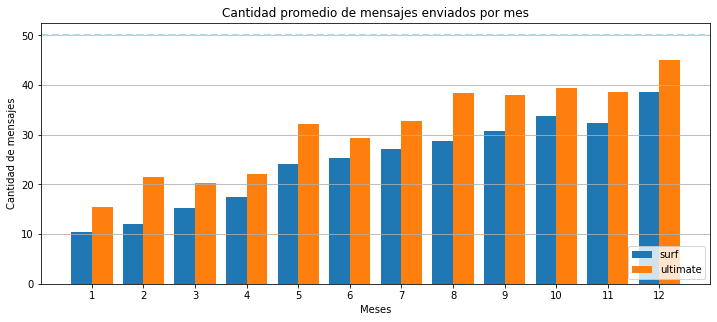

In [95]:
# Primero definimos el figure y el axis para trabajar
fig, ax = plt.subplots(figsize=(12,4.8))

# De ahí definimos las barras
p1 = ax.bar(x - width/2,surf_data,width,label="surf")
p2 = ax.bar(x + width/2,ultimate_data,width,label="ultimate")

# Agregamos unas cosas para limpieza y orden
ax.set_ylabel('Cantidad de mensajes')
ax.set_xlabel('Meses')
ax.set_title('Cantidad promedio de mensajes enviados por mes')
ax.set_xticks(x)
ax.grid(axis='y')
ax.legend(loc='lower right')

# Agregamos una linea con la cantidad de mensajes incluidos en surf (no lo hacemos para ultimate pues ese numero es demasiado grande)
plt.axhline(y=50, color='lightblue', linestyle='--', linewidth=2)

# Nos encargamos de saber que valor tiene cada barra con 2 cifras despues de la coma
#ax.bar_label(p1,padding=3,fmt='%.2f')
#ax.bar_label(p2,padding=3,fmt='%.2f')

# Restringimos el valor de y para ver mejor las barras y mostramos
plt.show()

En el caso de los mensaje podemos notar algo más curioso. Para empezar, los clientes de *ultimate* mandan más mensajes por mes en cualquier punto del año que los clientes de *surf*.
  
Otra tendencia muy marcada que podemos ver es como mes a mes suben la cantidad de mensajes mandados en ambos planes siendo la tendencia más marcada en *surf* que en *ultimate* el cual se mantiene alrededor de 38 mensajes entre Agosto a Noviembre dando un último salto en Diciembre.
  
Por último un detalle no menor es que aún en Diciembre con la mayor cantidad promedio de mensajes enviados notamos como ningún plan llega a alcanzar los mensajes que vienen incluidos con el plan (50) por lo que al menos en promedio no se genera un ingreso adicional respecto a los mensajes.
  
Ahora voy a analizar una cosa que me llamó la atención respecto a la tendencia marcada por lo que me detendré un momento a estudiar la "presencia" de los usuarios según el mes.

In [96]:
# Ahora vamos a buscar ver como la actividad de los usuarios se comporta según el mes del año
activity_table.groupby('month').count()['user_id']

month
1       6
2      16
3      35
4      71
5     106
6     144
7     180
8     233
9     280
10    343
11    410
12    469
Name: user_id, dtype: int64

Efectivamente notamos que la actividad general de los usuarios aumenta consistentemente conforme avanza el año.

In [97]:
# Ahora quiero ver si hay una mayor cantidad de usuarios registrandose en la segunda mitad del año
users['reg_date'].dt.month.value_counts().sort_values()

9     32
7     36
12    37
5     38
11    38
3     40
2     42
10    42
4     45
8     47
1     49
6     54
Name: reg_date, dtype: int64

Curiosamente, pasa al revés de lo que buscaba ya que noramos como Enero es incluso de los meses con más registros en la tabla. El motivo que queria revisar era si los resultados nuestros estuvieran sesgados no por comportamiento del usuario sino por una característica relacionada al registro de los clientes.

Viendo que el patron que buscaba no existe puedo avanzar con más tranquilidad para seguir observando el comportamiento de `messages`.

In [98]:
activity_table

,user_id,month,total_calls,total_minutes,total_messages,mb_used_per_month,plan,usd_monthly_income
0,1000,12,16,116.83,11,1901.47,ultimate,70.00
1,1001,8,27,171.14,30,6919.15,surf,20.00
2,1001,9,49,297.69,44,13314.82,surf,20.00
3,1001,10,65,374.11,53,22330.49,surf,90.09
4,1001,11,64,404.59,36,18504.30,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1498,6,37,225.57,0,14807.18,surf,20.00
2289,1499,10,53,363.28,0,19492.43,surf,70.00
2290,1499,11,45,288.56,0,16813.83,surf,40.00
2291,1499,9,41,330.37,0,12984.76,surf,20.00


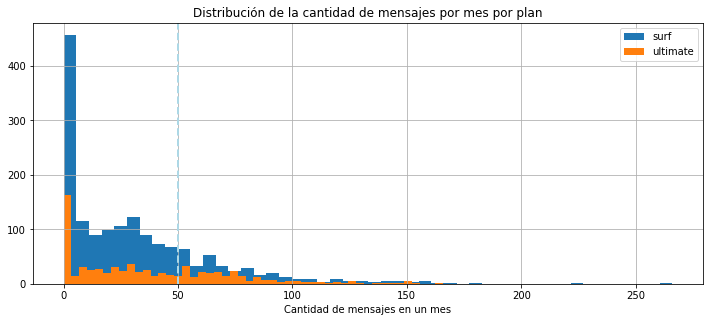

In [99]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
fig, ax = plt.subplots(figsize=(12,4.8))
bins = int(np.ceil(np.sqrt(activity_table.shape[0])))

# Definimos los histogramas
surf['total_messages'].hist(bins = bins, label='surf')
ultimate['total_messages'].hist(bins = bins, label='ultimate')

# Agregamos una linea con la cantidad de mensajes incluidos en surf (no lo hacemos para ultimate pues ese numero es demasiado grande)
plt.axvline(x=50, color='lightblue', linestyle='--', linewidth=2)

# Agregamos detalles de limpieza y orden
ax.set_xlabel('Cantidad de mensajes en un mes')
ax.set_title('Distribución de la cantidad de mensajes por mes por plan')
ax.legend(loc='upper right')

plt.show()

Honestamente, no me sorprende. En parte si me parecía un numero muy alto de mensajes por mes siendo que estamos en el siglo 21 y actualmente los mensajes de texto fueron practicamente reemplazados por aplicaciones como WhatsApp, por lo que me imaginaba que posiblemente haya valores anormalmente altos que alteren la media para arriba.
  
Efectivamente vemos eso, la gran mayoria de clientes tienden a mandar muy pocos mensajes por mes y solo un grupo particualar manda más de 100. Debido a la distribución que vemos acá tendremos que obtener la mediana tambien para tener un punto de referencia más representativo de la cantidad de mensajes.

In [100]:
# Para seguir vamos a observar los gráficos de cajas y bigotes
surf_data = surf['total_messages']
ultimate_data = ultimate['total_messages']
labels=['surf','ultimate']
colors = ['blue','orange']

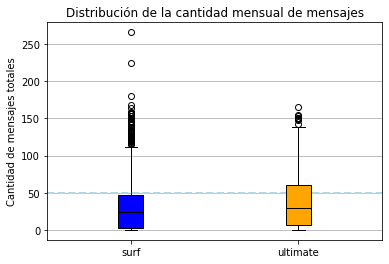

 Media de Ultimate: 37.55 
 Mediana de Ultimate: 30.00 
 Varianza de Ultimate: 1208.76 
 
 Media de Surf: 31.16 
 Mediana de Surf: 24.00 
 Varianza de Surf: 1126.72 



In [101]:
# De ahi trazaremos un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
# Definimos la figura y el eje
fig, ax = plt.subplots()

# Definimos el diagrama de caja propiamente
bplot = ax.boxplot(
    [surf_data,ultimate_data],
    vert=True,
    patch_artist=True,
    labels=labels,
    medianprops={'color':'black'}
)

# Asignamos los colores a las dos cajas
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Agregamos una linea con la cantidad de mensajes incluidos en surf (no lo hacemos para ultimate pues ese numero es demasiado grande)
plt.axhline(y=50, color='lightblue', linestyle='--', linewidth=2)

# Y finalmente asignamos labels y detalles para más claridad
ax.set_title('Distribución de la cantidad mensual de mensajes')
ax.set_ylabel('Cantidad de mensajes totales')
plt.grid(axis='y')
plt.show()

# Tambien vamos a buscar visualizar los números exactos de la media, mediana y varianza de nuestros datos debajo del gráfico
print(
    f' Media de Ultimate: {ultimate["total_messages"].mean():.2f} \n',
    f'Mediana de Ultimate: {ultimate["total_messages"].median():.2f} \n',
    f'Varianza de Ultimate: {ultimate["total_messages"].var():.2f} \n',
    '\n',
    f'Media de Surf: {surf["total_messages"].mean():.2f} \n',
    f'Mediana de Surf: {surf["total_messages"].median():.2f} \n',
    f'Varianza de Surf: {surf["total_messages"].var():.2f} \n',
)

Okay, no es un comportamiento muy similar al de las llamadas ya que notamos como los tres valores (media, mediana y varianza) se ubican por encima en el *ultimate* aunque al igual que en llamadas notamos como a pesar de tener una cantidad mayor y más alejada de valores atípicos la mera cantidad de clientes causa que la varianza en *surf* sea menor.
  
Podemos notar como ~25% de los casos exceden la cantidad de mensajes enviados en su periodo de tiempo y en base a lo visto previamente apostaría que son casos despues de Julio.
  
En resumen, lo primero que me llamó la atención fue la tendencia creciente de la cantidad de mensajes promedio respecto al progreso del año que se ve en ambos planes a pesar de que *surf* lo mantiene más que *ultimate*. Tambien podemos notar una vez más el impacto de la diferencia de prestadores de un plan (*surf*) en nuestras estadísticas. Y por último notamos como los clientes de *ultimate* tienden a mandar más mensajes por mes que los clientes de *surf*.

## <a id='toc6_3_'></a>[Internet](#toc0_)

Ahora vamos a proceder a analizar el valor que más interes me da. Vamos a proceder de forma igual al resto y veamos que sacamos!

In [102]:
# Primero creamos variables para la gráfica 
data = mean_table['mb_used_per_month']/1000         # Vamos a ver los GB no los MB para que el gráfico sea más entendible

# Cargamos lo labels para ubicar correctamente las barras
labels = data.index

# Ordenamos los labels y sumamos 1 para que no empiece en 0
x = np.arange(len(labels)) + 1

# Separamos los datos segun los planes
ultimate_data = data['ultimate']
surf_data = data['surf']

# Finalmente definimos el ancho de las barras
width = 0.4

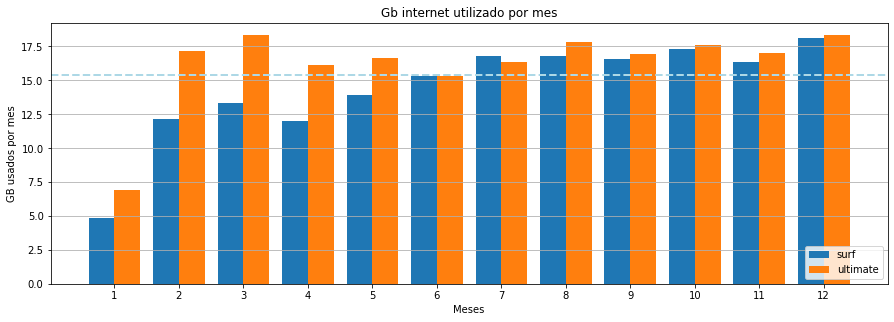

In [103]:
# Primero definimos el figure y el axis para trabajar
fig, ax = plt.subplots(figsize=(15,4.8))

# De ahí definimos las barras
p1 = ax.bar(x - width/2,surf_data,width,label="surf")
p2 = ax.bar(x + width/2,ultimate_data,width,label="ultimate")

# Agregamos unas cosas para limpieza y orden
ax.set_ylabel('GB usados por mes')
ax.set_xlabel('Meses')
ax.set_title('Gb internet utilizado por mes')
ax.set_xticks(x)
ax.grid(axis='y')
ax.legend(loc='lower right')

# Agregamos una linea con la cantidad de mensajes incluidos en surf (no lo hacemos para ultimate pues ese numero es demasiado grande)
plt.axhline(y=15.36, color='lightblue', linestyle='--', linewidth=2)

# Nos encargamos de saber que valor tiene cada barra con 2 cifras despues de la coma
#ax.bar_label(p1,padding=3,fmt='%.2f')
#ax.bar_label(p2,padding=3,fmt='%.2f')

# Restringimos el valor de y para ver mejor las barras y mostramos
plt.show()

Como era de imaginar, los consumos de internet iban a ser mucho mayores a los de llamadas y mensajes. A diferencia de los otros dos parámetros, podemos observar como en los promedios ya se supera la cantidad incluida en el plan!
  
Vemos que se repite el patron de que en Enero se usa menos el celular por ende menos recursos del proveedor aunque a diferencia de mensajes, ésto crece rapidamente para que en Junio ya alcancen ambos planes una "estabilidad" alrededor de los 16-18GB por mes. Éste crecimiento se ve mucho más brúsco en los clientes de *ultimate* que ya en Febrero alcanzan esa "meseta".
  
Otra cosa que podemos notar es como los clientes de *ultimate* tienden a gastar más datos móbiles por mes que los de *surf*.

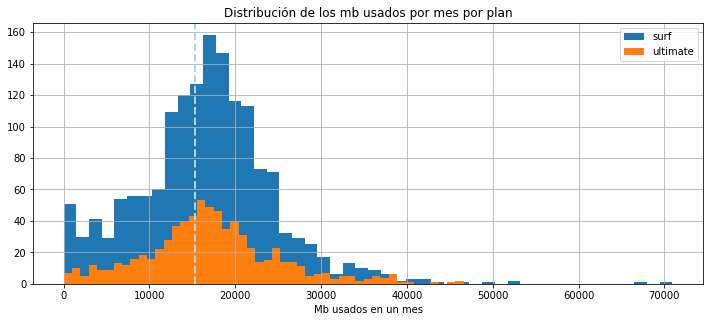

In [104]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
fig, ax = plt.subplots(figsize=(12,4.8))
bins = int(np.ceil(np.sqrt(activity_table.shape[0])))

# Definimos los histogramas
surf['mb_used_per_month'].hist(bins = bins, label='surf')
ultimate['mb_used_per_month'].hist(bins = bins, label='ultimate')

# Agregamos una linea con la cantidad de mensajes incluidos en surf (no lo hacemos para ultimate pues ese numero es demasiado grande)
plt.axvline(x=15360, color='lightblue', linestyle='--', linewidth=2)

# Agregamos detalles de limpieza y orden
ax.set_xlabel('Mb usados en un mes')
ax.set_title('Distribución de los mb usados por mes por plan')
ax.legend(loc='upper right')

plt.show()

Éste histograma está muy interesante ya que podemos observar formas que empiezan a parecerse a una distribución normal. Era de esperar que los clientes de *surf* se ubiquen mayormente en las cercanías de 15360mb pues es lógico que cuando una persona alcanza la cantidad incluida en el paquete (o se acerca a ese número) empiecen a regular su uso de internet para no pagar mucho más o no pasarse en sí. Lo curioso es cómo los clientes de *ultimate* tambien se central cercano a ese valor por más que ellos tengan literalmente el doble de megas proporcionados por el plan.
  
Otra cosa que me llama mucho la atención es como los valores atípicos que se ubican por encima de 50000mb son todos de *surf*! Acaso ellos hicieron el mismo calculo que yo y supieron que al no gastar más de 250Gb por mes les era más rentable *surf*?
  
Y una vez más el historgrama nos muestra la simple diferencia de clientes entre un plan y otro! Eso causa que la distribución de *surf* se parezca más a la normal que la de *ultimate*.

In [105]:
# Para seguir vamos a observar los gráficos de cajas y bigotes
surf_data = surf['mb_used_per_month']
ultimate_data = ultimate['mb_used_per_month']
labels=['surf','ultimate']
colors = ['blue','orange']

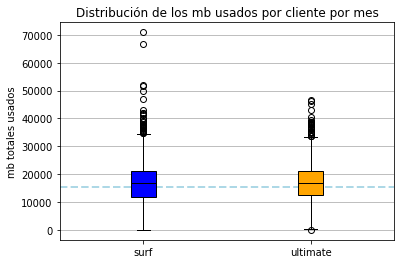

 Media de Ultimate: 17214.70 
 Mediana de Ultimate: 16858.34 
 Varianza de Ultimate: 61652293.32 
 
 Media de Surf: 16558.28 
 Mediana de Surf: 16829.31 
 Varianza de Surf: 64216395.84 



In [106]:
# De ahi trazaremos un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
# Definimos la figura y el eje
fig, ax = plt.subplots()

# Definimos el diagrama de caja propiamente
bplot = ax.boxplot(
    [surf_data,ultimate_data],
    vert=True,
    patch_artist=True,
    labels=labels,
    medianprops={'color':'black'}
)

# Asignamos los colores a las dos cajas
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Agregamos una linea con la cantidad de mensajes incluidos en surf (no lo hacemos para ultimate pues ese numero es demasiado grande)
plt.axhline(y=15360, color='lightblue', linestyle='--', linewidth=2)

# Y finalmente asignamos labels y detalles para más claridad
ax.set_title('Distribución de los mb usados por cliente por mes')
ax.set_ylabel('mb totales usados')
plt.grid(axis='y')
plt.show()

# Tambien vamos a buscar visualizar los números exactos de la media, mediana y varianza de nuestros datos debajo del gráfico
print(
    f' Media de Ultimate: {ultimate["mb_used_per_month"].mean():.2f} \n',
    f'Mediana de Ultimate: {ultimate["mb_used_per_month"].median():.2f} \n',
    f'Varianza de Ultimate: {ultimate["mb_used_per_month"].var():.2f} \n',
    '\n',
    f'Media de Surf: {surf["mb_used_per_month"].mean():.2f} \n',
    f'Mediana de Surf: {surf["mb_used_per_month"].median():.2f} \n',
    f'Varianza de Surf: {surf["mb_used_per_month"].var():.2f} \n',
)

Como dije, el caso de internet iba a ser mucho más interesante y alejado de lo que veníamos viendo con las llamadas y mensajes. Para empezar notamos como a diferencia de los otros parametros, ambos planes tienen sus medianas por encima de lo incluido en el pack *surf* con *ultimate* llegando a tal punto de **no** tener el limite inferior en 0.
  
Una cosa que vale la pena destacar es como mientras que los otros parametros tenian a las varianzas 2 ordenes de magnitud por encima de las medias, en éste caso son 3! Eso nos indica que en el caso de internet los clientes están mucho menos homogeneizados por lo que lograr representar al conjunto completo es más complicado.
  
Otra cosa que vale destacar es como a diferencia de los otros parámetros, la cantidad de clientes de surf no causó que haya una menor varianza. Eso puede ser debido a lo mencionado previamente al afrontar el dataframe de los planes... aunque no necesariamente de manera tan "matematica". 
  
Por supuesto siempre hay que dejar un margen a la gente simplemente optando por la opcion más barata sin mucho pensamiento de más, pues la verdad es que la cantidad de llamadas y mensajes que trae el plan *ultimate* es un exagerado al menos en mi caso.

## <a id='toc6_4_'></a>[Ingreso](#toc0_)

Ahora vamos a pasar a analizar una de las columnas de mayor interes, el ingreso mensual por cliente. En ésta sección observaremos aproximadamente lo mismo que en las otras, posiblemente buscando complementar con más gráficas viendo diferentes perspectivas pero con el mismo objetivo que en los otros parámetros:
  
 **Observar el comportamiento de los datos**

In [107]:
# Primero creamos variables para la gráfica 
data = mean_table['usd_monthly_income']

# Cargamos lo labels para ubicar correctamente las barras
labels = data.index

# Ordenamos los labels y sumamos 1 para que no empiece en 0
x = np.arange(len(labels)) + 1

# Separamos los datos segun los planes
ultimate_data = data['ultimate']
surf_data = data['surf']

# Finalmente definimos el ancho de las barras
width = 0.4

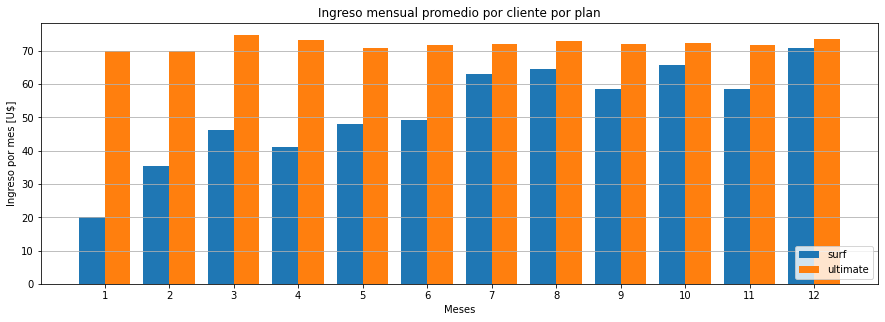

In [108]:
# Primero definimos el figure y el axis para trabajar
fig, ax = plt.subplots(figsize=(15,4.8))

# De ahí definimos las barras
p1 = ax.bar(x - width/2,surf_data,width,label="surf")
p2 = ax.bar(x + width/2,ultimate_data,width,label="ultimate")

# Agregamos unas cosas para limpieza y orden
ax.set_ylabel('Ingreso por mes [U$]')
ax.set_xlabel('Meses')
ax.set_title('Ingreso mensual promedio por cliente por plan')
ax.set_xticks(x)
ax.grid(axis='y')
ax.legend(loc='lower right')

# Nos encargamos de saber que valor tiene cada barra con 2 cifras despues de la coma
#ax.bar_label(p1,padding=3,fmt='%.2f')
#ax.bar_label(p2,padding=3,fmt='%.2f')

# Restringimos el valor de y para ver mejor las barras y mostramos
plt.show()

Como era de esperar, el ingreso mensual por cliente por plan nos muestra que por lo general un cliente de *ultimate* paga más al final del mes que uno de *surf* aunque éstos últimos se acercan bastante conforme avanza el año y con eso la actividad.
  
Por supuesto, hay que tener en mente la gran diferencia de clientes entre *surf* y *ultimate*; ya que si bien un Volkswagen vale mucho menos que un Ferrari, la empresa alemana logra sobrepasar a los exponentes italianos vendiendo muchos más autos baratos y sumando un total bastante por encima. Algo chico multiplicado por algo muy grande resulta en algo grande.
  
En base a lo que vamos viendo puedo hacer una estimación fundamentada de que al comienzo del año el plan *ultimate* debe recaudar más que *surf* pero conforme avanza el año y aumenta la actividad, más y más clientes de *surf* recurren a comprar mensajes, minutos y gb adicionales, resultando en que mientras más cerca de Diciembre nos encontremos más vemos como *surf* recauda más que *ultimate*.
  
Con ese pensamiento en mente vamos a proceder a usar nuestra tabla que casi se queda inutilizada y ver cuánto es el ingreso **total** por mes por plan.

In [109]:
# Primero creamos variables para la gráfica 
data = sum_table['usd_monthly_income']

# Cargamos lo labels para ubicar correctamente las barras
labels = data.index

# Ordenamos los labels y sumamos 1 para que no empiece en 0
x = np.arange(len(labels)) + 1

# Separamos los datos segun los planes
ultimate_data = data['ultimate']
surf_data = data['surf']

# Finalmente definimos el ancho de las barras
width = 0.4

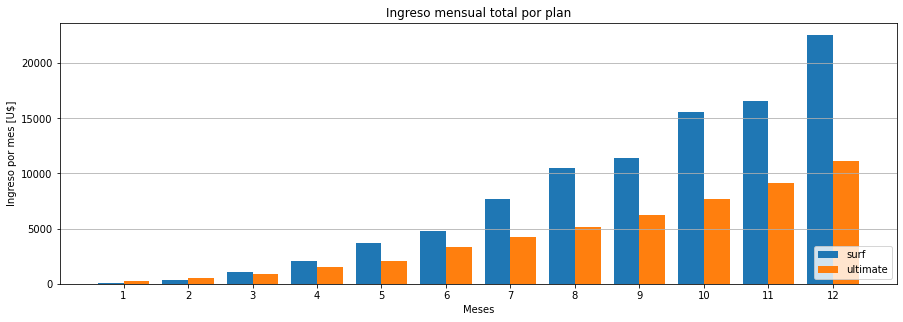

In [110]:
# Primero definimos el figure y el axis para trabajar
fig, ax = plt.subplots(figsize=(15,4.8))

# De ahí definimos las barras
p1 = ax.bar(x - width/2,surf_data,width,label="surf")
p2 = ax.bar(x + width/2,ultimate_data,width,label="ultimate")

# Agregamos unas cosas para limpieza y orden
ax.set_ylabel('Ingreso por mes [U$]')
ax.set_xlabel('Meses')
ax.set_title('Ingreso mensual total por plan')
ax.set_xticks(x)
ax.grid(axis='y')
ax.legend(loc='lower right')

# Nos encargamos de saber que valor tiene cada barra con 2 cifras despues de la coma
#ax.bar_label(p1,padding=3,fmt='%.0f')
#ax.bar_label(p2,padding=3,fmt='%.0f')

# Restringimos el valor de y para ver mejor las barras y mostramos
plt.show()

Notamos como la predicción fue una subestimación pues al llegar el mes de Marzo ya vemos como *surf* supera en ingresos a *ultimate* y esa diferencia solo crece más y más con el paso del año.

Viendo éste gráfico me vino una pregunta: **Como es que una empresa de telecomunicaciónes se subsiste a base de pocos ingresos?**
  
Pero, tras pensarlo un rato me di cuenta de una cosa
  
No solo estamos viendo el tráfico de 500 personas: Estamos viendo el tráfico de 500 personas pero comenzamos con una cantidad de muestreo chica al comienzo del año y conforme va pasando el año aumenta la cantidad de personas en que se subscriben a la empresa! Eso explica todos los otros gráficos de barras y da una razon obvia pero escondida detras de la pendiente que vamos viendo tanto. Por supuesto, eso no quita mérito a las conclusiones que sacamos al comparar los planes en cada mes, incluso diría que nos permite tener un seguimiento del cambio tanto relativo como total. 
   
Que tan diferente se verá nuestra tabla `activity_table_with_missing`?

In [111]:
# Primero creamos variables para la gráfica 
data = activity_table_with_missing.groupby(['month','plan']).sum().unstack()['usd_monthly_income']

# Cargamos lo labels para ubicar correctamente las barras
labels = data.index

# Ordenamos los labels y sumamos 1 para que no empiece en 0
x = np.arange(len(labels)) + 1

# Separamos los datos segun los planes
ultimate_data = data['ultimate']
surf_data = data['surf']

# Finalmente definimos el ancho de las barras
width = 0.4

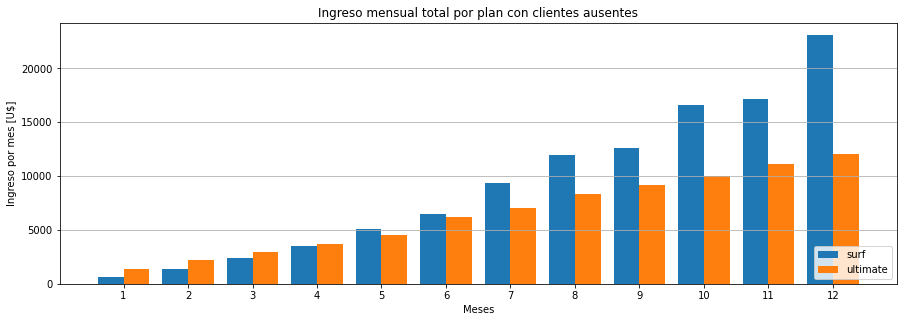

In [112]:
# Primero definimos el figure y el axis para trabajar
fig, ax = plt.subplots(figsize=(15,4.8))

# De ahí definimos las barras
p1 = ax.bar(x - width/2,surf_data,width,label="surf")
p2 = ax.bar(x + width/2,ultimate_data,width,label="ultimate")

# Agregamos unas cosas para limpieza y orden
ax.set_ylabel('Ingreso por mes [U$]')
ax.set_xlabel('Meses')
ax.set_title('Ingreso mensual total por plan con clientes ausentes')
ax.set_xticks(x)
ax.grid(axis='y')
ax.legend(loc='lower right')

# Nos encargamos de saber que valor tiene cada barra con 2 cifras despues de la coma
#ax.bar_label(p1,padding=3,fmt='%.0f')
#ax.bar_label(p2,padding=3,fmt='%.0f')

# Restringimos el valor de y para ver mejor las barras y mostramos
plt.show()

Bueno, eso tuvo un efecto bastante más chico del que esperaba, pero podemos notar al menos como el patrón general se mantiene casi que con un aumento casi constante a lo largo de la tabla. Notamos que *ultimate* se ve más afectado proporcionalmente a ese cambio mientras que *surf* si bien no es como que no haya aumentado, su aumento fue menor. 

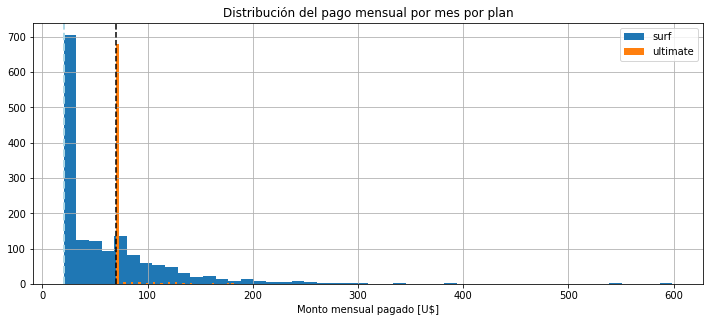

In [113]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
fig, ax = plt.subplots(figsize=(12,4.8))
bins = int(np.ceil(np.sqrt(activity_table.shape[0])))

# Definimos los histogramas
surf['usd_monthly_income'].hist(bins = bins, label='surf')
ultimate['usd_monthly_income'].hist(bins = bins, label='ultimate')

# Agregamos unas lineas con los precios de surf y ultimate
plt.axvline(x=20, color='lightblue', linestyle='--', linewidth=2)
plt.axvline(x=70, color='black', linestyle='--')

# Agregamos detalles de limpieza y orden
ax.set_xlabel('Monto mensual pagado [U$]')
ax.set_title('Distribución del pago mensual por mes por plan')
ax.legend(loc='upper right')

plt.show()

Bueno... eso se ve... interesante... Aunque pensandolo bien, tiene sentido! Parece que basicamente todos los clientes de *ultimate* pagan U$70 al mes, eso tiene sentido ya que la unica forma en la que veo posible gastar más es a través de la compra de más Gb pues... 1000 mensajes y 3000 minutos me parece una cantidad muy dificil de superar! Y podria decir lo mismo de esa cantidad de GB, pero con más margen de error.
  
Al parecer sucede algo parecido pero no tan pronunciado con los clientes de *surf*, de lo que vemos se pueden arreglar bastante bien con los recursos con los que viene el plan! Por supuesto, hay mucho más valores alejados de lo normal que en *ultimate*.

Viendo como se comporta el histograma me da curiosidad como se verá el gráfico de cajas y bigotes, así que no pierdamos más tiempo y vamos a ello!

In [114]:
# Para seguir vamos a observar los gráficos de cajas y bigotes
surf_data = surf['usd_monthly_income']
ultimate_data = ultimate['usd_monthly_income']
labels=['surf','ultimate']
colors = ['blue','orange']

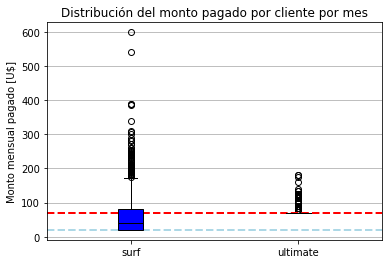

 Media de Ultimate: 72.38 
 Mediana de Ultimate: 70.00 
 Varianza de Ultimate: 137.64 
 
 Media de Surf: 61.06 
 Mediana de Surf: 40.36 
 Varianza de Surf: 3184.66 



In [115]:
# De ahi trazaremos un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
# Definimos la figura y el eje
fig, ax = plt.subplots()

# Definimos el diagrama de caja propiamente
bplot = ax.boxplot(
    [surf_data,ultimate_data],
    vert=True,
    patch_artist=True,
    labels=labels,
    medianprops={'color':'black'}
)

# Asignamos los colores a las dos cajas
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Agregamos una linea con la cantidad de mensajes incluidos en surf (no lo hacemos para ultimate pues ese numero es demasiado grande)
plt.axhline(y=20, color='lightblue', linestyle='--', linewidth=2)
plt.axhline(y=70, color='red', linestyle='--', linewidth=2)

# Y finalmente asignamos labels y detalles para más claridad
ax.set_title('Distribución del monto pagado por cliente por mes')
ax.set_ylabel('Monto mensual pagado [U$]')
plt.grid(axis='y')
plt.show()

# Tambien vamos a buscar visualizar los números exactos de la media, mediana y varianza de nuestros datos debajo del gráfico
print(
    f' Media de Ultimate: {ultimate["usd_monthly_income"].mean():.2f} \n',
    f'Mediana de Ultimate: {ultimate["usd_monthly_income"].median():.2f} \n',
    f'Varianza de Ultimate: {ultimate["usd_monthly_income"].var():.2f} \n',
    '\n',
    f'Media de Surf: {surf["usd_monthly_income"].mean():.2f} \n',
    f'Mediana de Surf: {surf["usd_monthly_income"].median():.2f} \n',
    f'Varianza de Surf: {surf["usd_monthly_income"].var():.2f} \n',
)

Efectivamente el gráfico de cajas y bigotes iba a ser divertido! Como podemos ver, no es una exageración muy grande decir que basicamente todos los clientes de *ultimate* pagan 70 dolare por mes. Es tan centrado el gráfico que aún con pocos datos y una moderada cantidad de numeros atípicos vemos como el promedio solo sube a 72.38 dolares.
  
Por su parte, los clientes de *surf* se presentan mucho más distribuidos a lo largo de los valores con la mediana no muy por encima del precio del paquete. Notamos como tiene una varianza mucho más alta que *ultimate* y se ve claramente el origen de tal valor con esos valores por encima de U$300.
  
Es curioso como en el caso de la recaudación mensual por cliente el plan formó un rol fundamental, no tanto como lo que veníamos viendo con los otros parámetros.

# <a id='toc7_'></a>[Probar las hipótesis estadísticas.](#toc0_)

Ahora vamos a pasar a evaluar las hipótesis estadísticas que nos piden. Recapitulemos un poco:
- El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
- El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.
  
Para el primer punto es relativamente fácil pues ya realizamos el trabajo previo y podemos separar sin muchas complicaciones los dos conjuntos de datos para posteriormente someterlos a prueba de hipótesis y así determinar su certeza.
  
El segundo caso es un poco más complicado pues tendremos que primero lograr separar los conjuntos en base a la tabla `users` y recien ahí podremos someter los datos a pruebas estadísticas.

## <a id='toc7_1_'></a>[El ingreso promedio de los usuarios de los usuario de las tarifas de Ultimate y Surf difiere?](#toc0_)

Para éste caso vamos a someter los datos a una prueba de hipótesis para dos conjuntos de datos ya que simplemente queremos verificar si las medias son diferentes. La hipótesis son:
  
- H0: "No hay diferencia entre el ingreso de un plan o del otro"
- H1: "Hay diferencia entre el ingreso de un plan y de otro"
  
Ahora tenemos que definir nuestro nivel de significancia. Nuestra tabla total cuenta con un poco menos de 3000 filas lo que no es tanto, más tomando en cuenta que eso engloba a los dos planes. Por lo tanto voy a elegir un valor alfa del 5% para darle un buen margen pero no demasiado justo.

In [116]:
# Vamos a probar la hipotesis

# Designamos el alfa
alpha = 0.05 

# Cargamos los datos para someterlos a hipotesis posteriormente
ultimate_array = ultimate['usd_monthly_income'].values
surf_array = surf['usd_monthly_income'].values 

# Como sabemos que las varianzas son diferentes en cada grupo, establecemos el parámetro equal_var como Falso
results = st.ttest_ind(ultimate_array, surf_array, equal_var=False) 

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  4.396517788242151e-14
Rechazamos la hipótesis nula


Como podemos ver, la hipotesis nula fue rechazada y con justa medida. El valor p nos indica que la probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor es... 0.00001%! Y si lo pensamos bien, tiene sentido ya que a lo largo de los gráficos observamos como particularmente el ingreso de los clientes si presentaba tendencias muy marcadas y diferentes segun su plan.
  
Cabe destacar que la prueba nos dice respecto al ingreso **promedio** por cliente, como vimos eso no representa el ingreso total por plan ya que si bien *Ultimate* presenta un ingreso promedio mayor; es *Surf* el que se lleva la delantera debido a la cantidad de clientes que tiene.

## <a id='toc7_2_'></a>[El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones?](#toc0_)

Para éste caso nos encontramos con algo que honestamente, no nos veníamos preparando. Nosotros veníamos discriminando a los clientes en base a su plan y casi que nos habíamos olvidado que en la tabla `users` se incluía la ciudad de los mismos.
  
Aunque para nuestra suerte, éste problema no es algo rotundamente imposible de resolver ya que Python y pandas cuentan con un arsenal de herramientas a nuestra disposición para situaciones como ésta o peores.
  
Antes de elaborar las hipótesis, definir el alfa y escoger la prueba estadística vamos a obtener los conjuntos de datos en base a lo que queremos comprobar.

In [117]:
# Para encontrar los usuarios de NY-NJ vamos a usar la funcion str.find() y con eso hacemos un filtro
NY_NJ_filter = users['city'].str.find('NY-NJ').apply(lambda x: True if x > 0 else False)\

# Con ese filtro obtenemos las ids de los clientes de NY-NJ
ids_from_NY_NJ = users[NY_NJ_filter]['user_id'].values

# Ahora creamos un filtro para obtener las filas en activity_table
NY_NJ_filter_for_a_table = activity_table['user_id'].isin(ids_from_NY_NJ)

# Finalmente creamos una tabla solo con la actividad de los clientes de NY-NJ
NY_NJ_table = activity_table[NY_NJ_filter_for_a_table]

# Y creamos la opuesta para poder comparar sin problemas
other_regions_table = activity_table[~NY_NJ_filter_for_a_table]

# Veamos el tamaño de los datos entre si
print(f' Tamaño NY-NJ: {NY_NJ_table.shape[0]} \n Tamaño otras regiones: {other_regions_table.shape[0]} \n')

# Finalmente veamos si las varianzas entre los datos son similares
print(f' Varianza NY-NJ: {NY_NJ_table["usd_monthly_income"].var():.2f} \n Varianza de otras regiones: {other_regions_table["usd_monthly_income"].var():.2f}')

 Tamaño NY-NJ: 377 
 Tamaño otras regiones: 1916 

 Varianza NY-NJ: 1961.08 
 Varianza de otras regiones: 2309.36


Nuestro plan en base es usar la prueba estadística para conjuntos independientes (`ttest_ind()`). Aunque tenemos que tener en cuenta que uno de los parámetros que toma la función es `equal_var` la cual de ser `True` le transmite a la función que ambos conjuntos comparten la misma varianza.
  
Y si bien a primera vista pareciera que son diferentes, penosamente los homínidos como nosotros somos muy malos juzgando numeros grandes por lo que en situaciones como éstas recurrimos a algo más objetivo: las matemáticas.
  
Tras leer un poco la documentación de `scipy` encontré que en 1960 un estadounidense llamado Howard Levene desarrolló una prueba para comparar las varianzas de dos conjuntos de datos! Tras asegurarme que la prueba se aplicara a las distribuciones que voy encontrando decidí traerlo al código y ahora veremos los resultados.

In [118]:
# Para verificar si las varianzas son efectivamente diferentes vamos a someterlas a la prueba de Levene
levene = st.levene(NY_NJ_table["usd_monthly_income"],other_regions_table["usd_monthly_income"])
levene

LeveneResult(statistic=2.3978073707673926, pvalue=0.12164356636111064)

Con un *`statistic`* de 2.4 y un *`pvalue`* de 0.12, la prueba de Levene nos indica que bajo el nivel de confianza que tenemos actualmente (5%) las varianzas se consideran estadísticamente iguales por lo que tendremos que tomar eso en cuenta a la hora de realizar la prueba.

Con las tablas listas y separadas podemos embarcarnos en la ardua tarea de someter a nuestras hipótesis a una prueba estadística. Para eso definamos primero cuales son nuestras hipótesis:

- H0: "No hay diferencia entre el ingreso de un usuario en los estados de Nueva York-Nueva Jersey"
- H1: "Hay una diferencia entre el ingreso de un usuario en los estados de Nueva York-Nueva Jersey"
  
Ahora debemos definir el grado de significancia de nuestra prueba. Dado que el conjunto total de datos sigue siendo el mismo, vamos a seguir con el mismo alfa del 5%.

In [119]:
# Vamos a probar la hipotesis de que el ingreso 

# Debido a la baja cantidad de datos vamos a tomar un alfa de éste valor
alpha = 0.05

# Cargamos los datos para someterlos a hipotesis posteriormente
NY_NJ_array = NY_NJ_table['usd_monthly_income'].values
other_regions_array = other_regions_table['usd_monthly_income'].values 

# Como sabemos que las varianzas son iguales estadísticamente, establecemos el parámetro equal_var como Verdadero
results = st.ttest_ind(NY_NJ_array, other_regions_array, equal_var=True) 

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.04814742715663469
Rechazamos la hipótesis nula


Por lo que podemos ver, nuestra hipótesis nula fue rechazada por lo que si hay una diferencia en el ingreso de los clientes de NY-NJ respecto al de los clientes de las otras regiones. Por supuesto, hay que destacar que ésta prueba no nos indica si la diferencia es mayor o menor ni la magnitud de la misma.

Pero por el momento tenemos la certeza de que los clientes residentes en Nueva York-Nueva Jersey si presentan un ingreso promedio mayor al del resto de las regiones, y como bonus tambien sabemos que la distribución de los mismos también es diferente pues presentan varianzas diferentes. 

# <a id='toc8_'></a>[Conclusión general](#toc0_)

Finalmente, llegamos a la última isla que conforma éste archipielago del conocimiento. A lo largo de nuestro embarque nos encontramos con múltiples problemas que logramos superar con la ayuda de funciones pertenecientes a Python, a algún paquete o fabricadas por nosotros.
  
Nuestro primer obstáculo fue el mismo que nos vamos a encontrar siempre que trabajemos con datos: problemas en los datos. Para nuestra suerte, no encontramos muchos problemas y pudimos pasar ágilmente a la siguiente sección.
  
Despues llegó el primer verdadero problema, teniamos toda la información esparcida en múltiples tablas con factores que se repetían entre ellas o datos que no nos eran precisamente útiles en nuestro contexto. Al usar esos factores que se repetían (particularmente `user_id`) logramos recopilar casi toda la información necesaria para observar los datos. Dije casi ya que un factor, `usd_monthly_income`, no era brindado directamente por las tablas. ¡Justo uno de los factores más importantes no se encontraba explícito! Aunque ese problema fue pasajero, pues la información necesaria para obtener tales valores estaba en nuestros datos, solo era cuestión de poner manos a la obra.
  
Con los datos ya completos, pasamos a analizar de manera principalmente gráfica la distribución de los datos. Algo que notamos es que los datos vinculados al comportamiento de los usuarios presentaban una similaridad entre los planes *ultimate y surf*. Obviamente decir que sus comportamientos eran iguales es estirar muy lejos, pero ciertamente notabamos un parecido que superaba la diferencia clave de el contraste de cantidad entre los dos planes.
  
Ese patrón no se mantuvo así para un parámetro , que si bien dependiente del comportamiento del usuario, era determinado por un factor específico independiente de cuántas llamadas realice el cliente; `usd_monthly_income`. Tras observar como es el pago mensual de los clientes discriminando por su plan se nos hizo cada vez más evidente la fuerte conexión entre el pago y el plan.
  
Finalmente llevamos los datos al campo de batalla y los llevamos al límite con pruebas mucho más rigurosas: **la prueba de hipótesis.**
- El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
  
    Nuestra primera pregunta (y consecuentemente hipótesis) era basicamente una crónica de una muerte anunciada pues la prueba estadística rechazó la hipótesis nula con un margen muy notorio. En éste caso decidimos omitir una tabla que originalmente creé para ésta parte, `sum_table`. El motivo atrás de esa decisión fue que no vi una diferencia significativa entre las dos tablas más que un aumento practicamente constante en todos los valores por lo que ese cambio no alteraba el comportamiento de nuestros datos.
- El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.
  
  Nuestra segunda hipótesis me agarró desprevenido por más que fuera el 50% de las preguntas que decidí contestar. En éste caso realicé más suposiciones. Primero asumí que ésta discriminación no creó irregularidades en los datos las cuales posteriormente puedan alterar nuestras conclusiones. Otro factor que asumí fue que las siglas *NY-NJ* efectivamente representaban el colectivo de personas sobre las cuales yo debía realizar el análisis, podría haber hecho más incapié en confirmar si estaba en lo correcto pero ante la incerteza de la pregunta y el detalle de que teníamos tantas ciudades diferentes en nuestros usuarios (aparte de mi ignorancia sobre las ciudades y estados de EEUU), decidí ahorrarme ese paso e ir más rápido a las pruebas.
  
Por lo tanto, tras viajar por éstos mares de información llegué a la conclusión de que si bien hay muchos factores del día a día de la gente que determina el monto que van a pagar a fin de mes, nunca hay que sacar del medio el plan que eligieron en un día para su servicio de telefonía. Otro detalle importante que me parece necesario destacar es que no es conveniente basar las conclusiones con el consumo promedio de un cliente sin más. Es importante también notar la recaudación de todos los clientes respecto a un plan. Ese detalle que puede parecer algo menor, termina causando que un plan inicialmente menor resulte en una recaudación total mayor ya que como cualquier economista sabe: *A menor precio, mayor demanda.* Una cosa más que me parece importante destacar es que la enorme prestación de recursos que vienen con el plan *Ultimate* causa que la gran mayoría de los clientes paguen básicamente lo mismo todos los meses ya que es muy difícil utilizar tal volumen de prestaciones en el plan.
  
Y aquí termina nuestro viaje. Espero que los vientos de la sabiduría le sean favorables marinero ¡Y recuerde que por más que los océanos del conocimiento parezcan eternos, es a través de ellos que podemos llegar al tesoro del aprendizaje!